**Problem:3**

In [ ]:
Importing the required packages

In [1287]:
import math
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

From the below code we are just loading the cities csv and which is seperated by the ; and also, we are also verifying the shape of the cities csv file

In [1288]:
dataset = pd.read_csv("cities.csv",sep=';',header=None) #loading the cities csv file with seperator ;
print('The shape of the cities csv file is',dataset.shape) #priniting the shape of the cities data set
print(' ')
dataset.head(10) #priniting the few rows from the data set

The shape of the cities csv file is (24, 26)
 


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Barcelona,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,...,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33,NaN
1,Belgrade,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,...,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66,NaN
2,Berlin,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,...,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06,NaN
3,Brussels,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,...,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85,NaN
4,Bucharest,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,...,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12,NaN
5,Budapest,1498.79,316.41,689.06,1131.52,639.77,0.00,1011.31,1894.95,927.92,...,563.93,1247.61,443.26,811.11,1556.51,629.63,1316.59,216.98,545.29,NaN
6,Copenhagen,1757.54,1327.24,354.03,766.67,1571.54,1011.31,0.00,1238.38,287.97,...,838.00,1025.90,633.05,1529.69,1143.40,1635.54,521.68,868.87,667.80,NaN
7,Dublin,1469.29,2145.39,1315.16,773.20,2534.72,1894.95,1238.38,0.00,1073.36,...,1374.91,776.83,1465.61,1882.22,2314.19,2471.02,1626.56,1680.00,1823.72,NaN
8,Hamburg,1471.78,1229.93,254.51,489.76,1544.17,927.92,287.97,1073.36,0.00,...,610.17,744.63,492.25,1307.51,1414.16,1554.82,809.65,742.79,750.49,NaN
9,Istanbul,2230.42,809.48,1735.01,2178.85,445.62,1064.76,2017.17,2950.11,1983.75,...,1582.16,2253.98,1507.55,1373.81,2099.29,502.61,2171.65,1273.88,1386.08,NaN


As , we see from the data set, the 1st columns is the names of the city, which can be removed for multi-dimensional scaling puropse , and also, we can also see the last columns which consist of null values, we can also drop the last column for mds.

In [1289]:
newmatrix = np.array(dataset.iloc[:,1:25].values) #resetting the dataset by removing the 1st and last columns which is stored as the distance matrix
print('After prepocessing the csv file shape is',newmatrix.shape) #priniting the shape of the matrix

After prepocessing the csv file shape is (24, 24)


From the above we can see that, 1 and last columns are ignored and the stored the remaining columns data as the matrix form 

In [1290]:
print('The matrix with the cities csv file\n',newmatrix) #printing the matrix

The matrix with the cities csv file
 [[   0.   1528.13 1497.61 1062.89 1968.42 1498.79 1757.54 1469.29 1471.78
  2230.42 2391.06 1137.67  504.64  725.12 3006.93 1054.55  831.59 1353.9
   856.69 2813.02 1745.55 2276.51 1347.43 1862.33]
 [1528.13    0.    999.25 1372.59  447.34  316.41 1327.24 2145.39 1229.93
   809.48  976.02 1688.97 2026.94  885.32 1710.99  773.33 1445.7   738.1
   721.55 1797.75  329.46 1620.96  489.28  826.66]
 [1497.61  999.25    0.    651.62 1293.4   689.06  354.03 1315.16  254.51
  1735.01 1204.    929.97 1867.69  840.72 1607.99  501.97  876.96  280.34
  1181.67 1319.62 1318.67  810.38  523.61  516.06]
 [1062.89 1372.59  651.62    0.   1769.69 1131.52  766.67  773.2   489.76
  2178.85 1836.2   318.72 1314.3   696.61 2253.26  601.87  261.29  721.08
  1171.34 1903.66 1697.83 1280.88  914.81 1159.85]
 [1968.42  447.34 1293.4  1769.69    0.    639.77 1571.54 2534.72 1544.17
   445.62  744.44 2088.42 2469.71 1331.46 1497.56 1186.37 1869.95 1076.82
  1137.38 1740.39  29

From the above result we can say that the matrix is symmetrical

Now, we can implement the  multi-dimensional scaling
(MDS), embed the points on a 2D plane

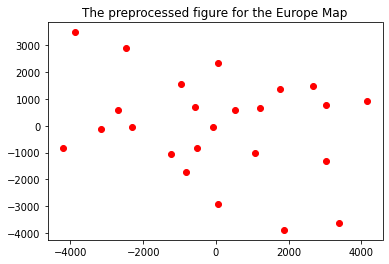

In [1291]:
mdsmodel = MDS(n_components=2, max_iter=1000) #using MDS package connverting the matrix
citiesmdsmodel = mdsmodel.fit_transform(newmatrix) #fitting the matrix
plt.scatter(citiesmdsmodel[:,0],citiesmdsmodel[:,1],color = 'red') #scattering the points on the scatter plot
plt.title('The preprocessed figure for the Europe Map')
plt.show()

we had recieved the map up to a reflection/rotation, so we  have to post-process the answer that you get from MDS. To do this we can mathematical way of using the sin and cos functions which helps to rotate the data points withe respective angles

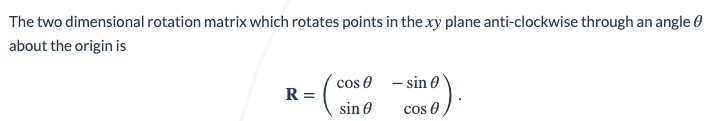

From the above , we can implement in which helps to rotate the data points with the particular angle 

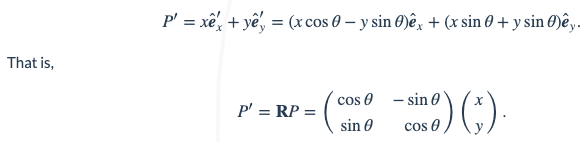

The angled points matrix
 [[-2424.31020421  1795.18149136  -539.00896356 -2305.92374289
   3052.71463135  1219.89205027  -847.66726406 -4221.62725453
  -1259.43806962  4182.73404912  3019.04900912 -3151.25380748
  -3825.31056917  -920.53587327  3317.49634183  -571.21979283
  -2674.16248819   -82.30940515   109.98059552  1812.59708285
   2698.69865648    16.05420189   543.39332222  1054.97600296]
 [-2847.05241275 -1391.28320868   851.73452088    89.84074458
   -836.02734937  -700.31295251  1724.98424476   899.12473988
   1089.37494786  -982.90420703  1244.12271876   175.93007049
  -3425.02562012 -1552.95609749  3579.21593401  -703.66354371
   -543.95270266    39.59171341 -2344.03083283  3853.12825183
  -1527.24271234  2915.1492436   -588.72334011   980.97784953]]


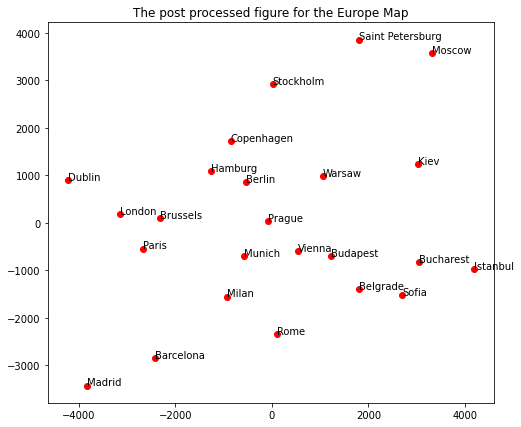

In [1292]:
degree=-1. #assigning the degree randomly
degree=np.deg2rad(degree) #converting the degree into radians
c, s = np.cos(degree), np.sin(degree) #computing the values of cos and sin
cosine1=c*citiesmdsmodel[:,0] 
cosine2=c*citiesmdsmodel[:,1]
sine3=s*citiesmdsmodel[:,0]
sine4=s*citiesmdsmodel[:,1]
angledpoints1=cosine1-sine4 #this will rotate the data points according to to degree which is assigned above
angledpoints2=sine3-cosine2
angledpointsmatrix = np.array(((angledpoints1), (angledpoints2)))
print('The angled points matrix\n',angledpointsmatrix)
figure,angledpoints = plt.subplots(figsize=(8,7)). #plotting the figure after rotating the data points based on the degree
angledpoints.scatter(angledpoints1,angledpoints2,color='red')
for i,j in enumerate(np.array(dataset.iloc[:,0].values)):    #looping to gives the cities names to the data points
    angledpoints.annotate(j,(angledpoints1[i],angledpoints2[i])) #getting the names of the cities according the datapoints
plt.title('The post processed figure for the Europe Map')
plt.show()